<a href="https://colab.research.google.com/github/dagarzon1/Prueba_Tecnica/blob/master/Prueba_tecnica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#from google.colab import drive
#drive.mount('/content/gdrive')

from google.colab import files
uploaded = files.upload()

Saving News_Category_Dataset_v2.json to News_Category_Dataset_v2.json


In [127]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
import json

data = pd.read_json('/content/News_Category_Dataset_v2.json', lines=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [128]:
data['date'] = pd.to_datetime(data['date'])
data['category'][data['category'] == 'CULTURE & ARTS'] = 'ARTS & CULTURE'
data['category'][data['category'] == 'ARTS'] = 'ARTS & CULTURE'
data['category'][data['category'] == 'THE WORLDPOST'] = 'WORLDPOST'
data['category'][data['category'] == 'PARENTING'] = 'PARENTS'
data['category'][data['category'] == 'STYLE & BEAUTY'] = 'STYLE'
category = data['category'].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ip

In [0]:
cwlist = list(stopwords.words('english'))
cwlist.extend(['the', 'to', 'of', 'in', 'and', 'a', 'is', 'for', 'on', 'with', 'at',
          'new', 'her', 'about', 'you', 'his', 'from', 'this', 'after', 'are', 'will',
          'as', 'be', 'that', 'out','has', 'up', 'was', 'it', 'an', 'all','just', '&',
          'how', 'your', 'by', 'what', 'not', 'have', "'the", "i", "you", 'he', 'she',
          'we', 'they', 'my', 'yours', 'its', 'their', 'our', 'us', 'them', 'him', 'why',
          'who', 'where', 'when', 'whom', 'get', 'gets', 'here', "here's", 'off', 'so',
          'down', 'up', '(photos)', '(video)', 'over', 'says', 'can', 'help', '--', 'un',
          'more', '(photo)', '', 'were', 'been', 'had', 'but', 'say', 'said.', 'or', 'no',
         "it's", '"the', 'some','"i', 'if', 'do', 'than', 'also', 'said', 'one', 'two',
         'would', 'could', 'got', "he's", 'first', 'there', 'be', 'never', 'because', 'told',
         'into', 'never', 'ever', 'even', 'most', 'these', 'those', "don't", "you're", 'me', 
         'going', 'many', "we're", "i'm", '-', 'last', 'am', 'are', 'is', "i've", 'like', 'only',
         'around', 'which', 'being', 'should', 'say?', 'little', 'more?'])

In [0]:
hl ={}
author = {}
sd = {}
for i in category:
    title = data['headline'][data['category'] == i]
    a = pd.Series(' '.join(title).lower().split()).value_counts()
    a = a.drop(labels=cwlist, errors='ignore')
    a = a[:10]
    hl[i] = a   
    
    title = data['authors'][data['category'] == i]
    title = title.str.split(',').str[0]
    a = title.value_counts()
    a = a.drop(labels=cwlist, errors='ignore')
    a = a[:3]
    author[i] = a
    
    title = data['short_description'][data['category'] == i]
    a = pd.Series(' '.join(title).lower().split()).value_counts()
    a = a.drop(labels=cwlist, errors='ignore')
    a = a[:10]
    sd[i] = a   

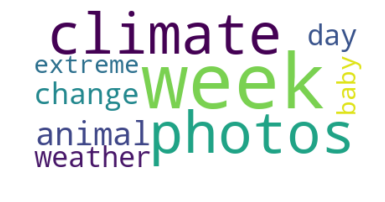

In [131]:
for i in category:
    words = list(hl[i].keys())
    text = " ".join(words)
    wordcloud = WordCloud(background_color="white").generate(text)

    # Display the generated image
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    plt.savefig("img/" + str(i)+ '_hl' + ".png", format="png")

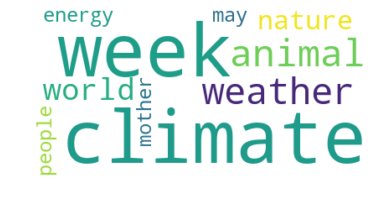

In [132]:
for i in category:
    words = list(sd[i].keys())
    text = " ".join(words)
    wordcloud = WordCloud(background_color="white").generate(text)

    # Display the generated image
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    plt.savefig("img/" + str(i)+ '_sd' + ".png", format="png")

POLITICS
POLITICS
POLITICS
POLITICS
POLITICS
WELLNESS
WELLNESS


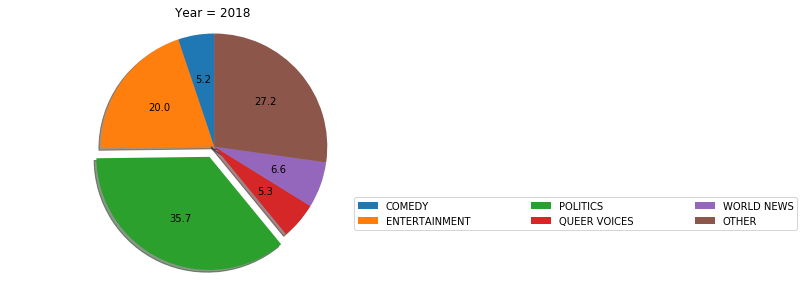

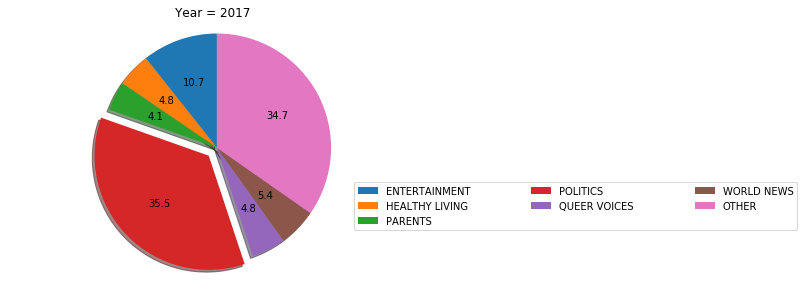

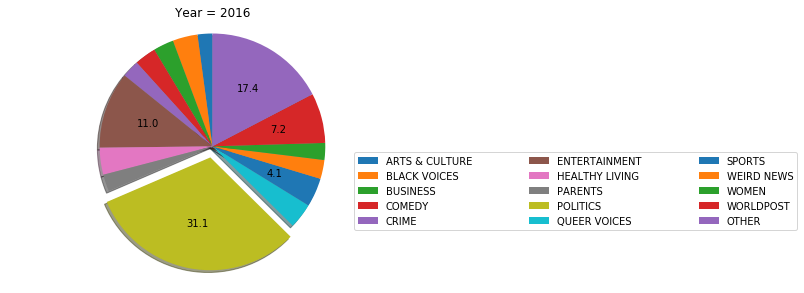

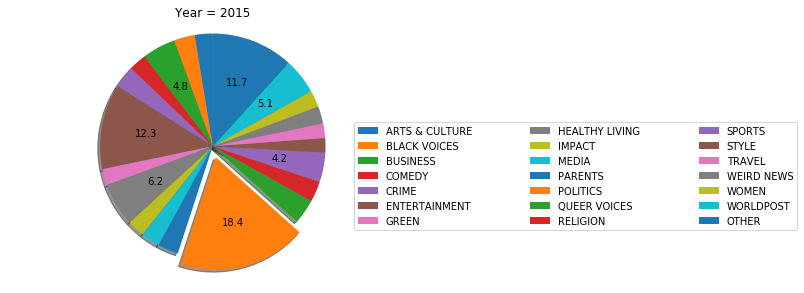

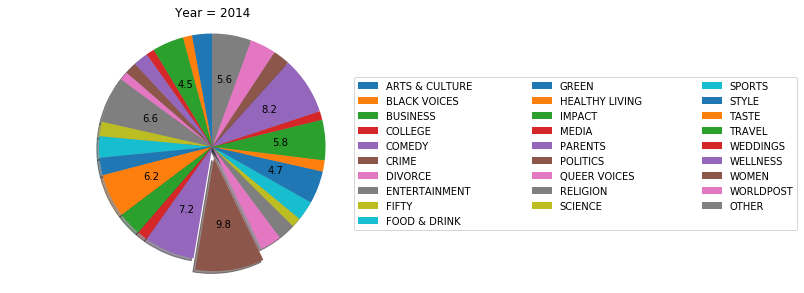

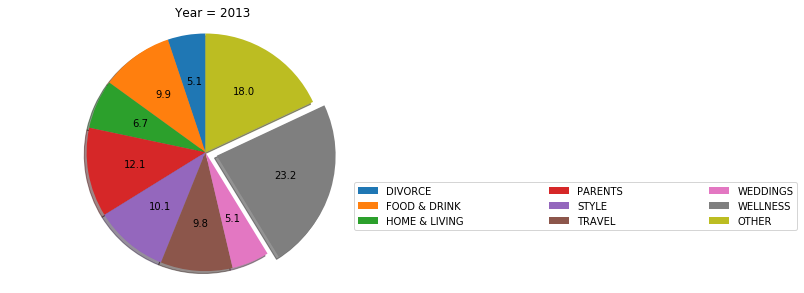

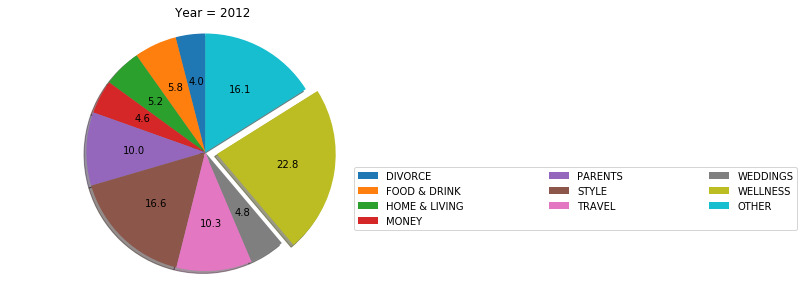

In [133]:
years = data.date.dt.year.unique()
def my_autopct(pct):
    return ('%.1f' % pct) if pct > 4 else ''

for i in years:
    a = data.date.dt.year[data.date.dt.year==i]
    a = a.groupby(data.category).count()
    lab = np.array(list(a.keys()))
    n = np.array(a)*100/sum(a)
    other = 100
    th = 5
    while(other>np.max(n)):
        ii = n>th
        other = np.sum(n[ii==False])
        th = th - 1 
    val = n[ii]
    lab_ = lab[ii]
    n = np.append(val,other)
    lab = np.append(lab_, 'OTHER')
    
    explode = np.zeros(len(n))
    explode[np.argmax(n)] = 0.1
    fig1, ax1 = plt.subplots()
    print(lab[np.argmax(n)])
    ax1.pie(n, explode=explode, autopct=my_autopct,shadow=True, startangle=90)
    plt.legend(lab, loc=3, ncol=3, mode="expand", borderaxespad=0., bbox_to_anchor=(.85, 0.2, 1.1, 1.103))
    ax1.axis('equal')
    plt.tight_layout()
    plt.title('Year = ' + str(i))
    plt.savefig("img/" + str(i) + ".png")


POLITICS
POLITICS
POLITICS
POLITICS
POLITICS
POLITICS
POLITICS
POLITICS
POLITICS
POLITICS
POLITICS
POLITICS


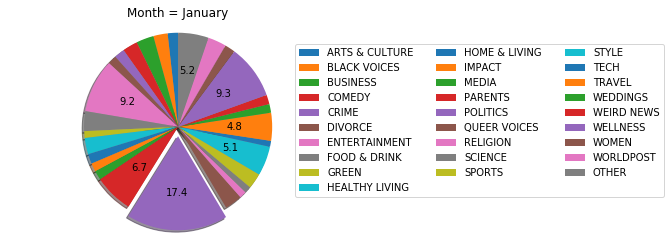

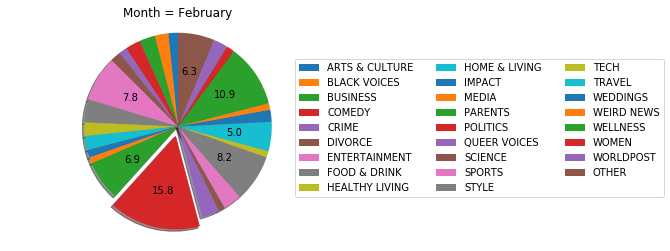

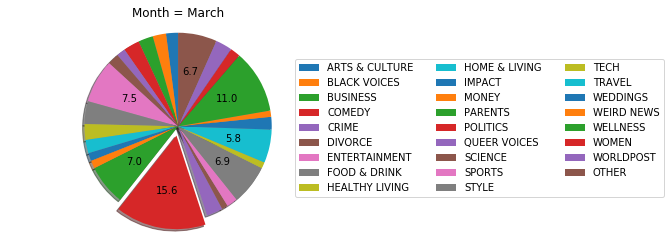

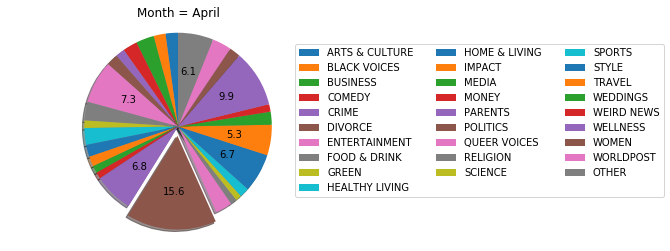

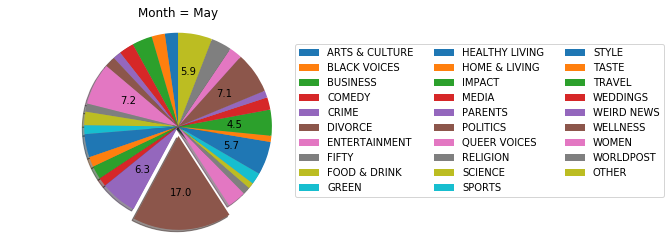

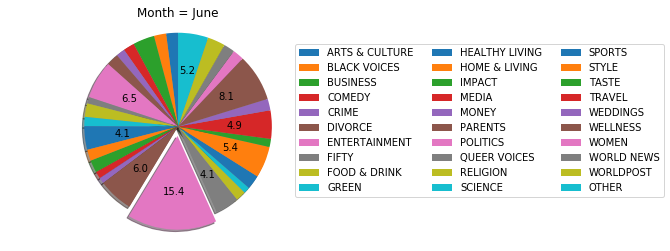

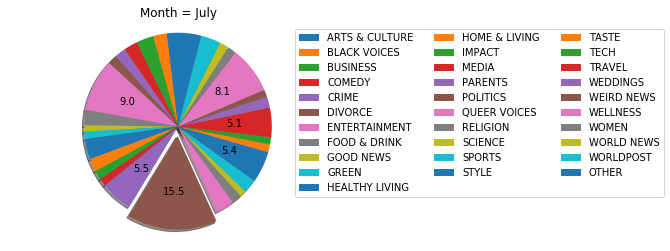

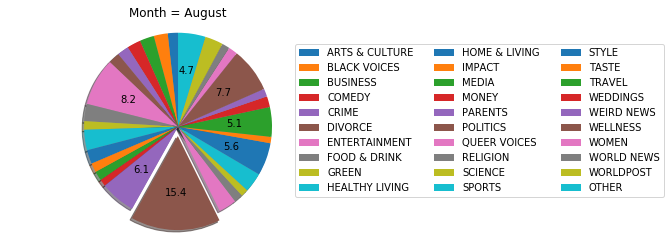

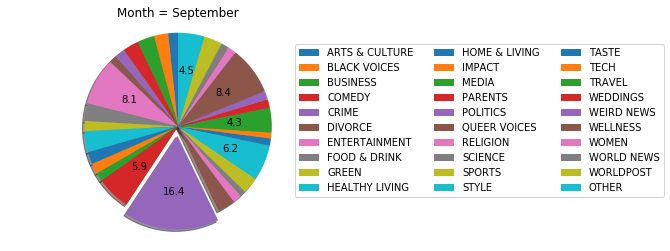

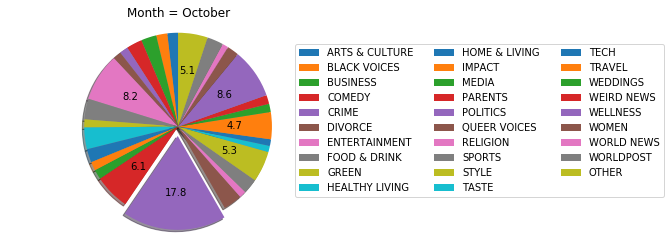

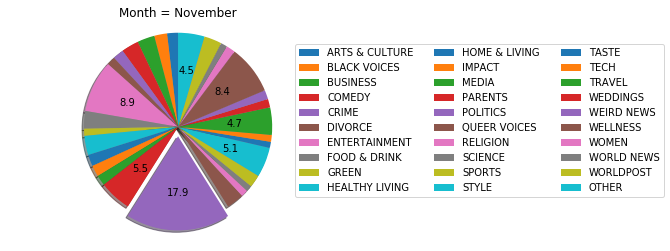

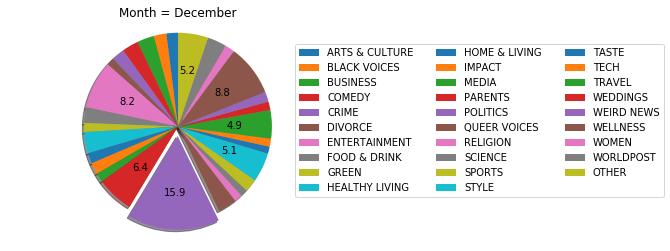

In [134]:
month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 
        9:'September', 10:'October', 11:'November', 12:'December'}

for i in range(1,13):
    a = data.date.dt.month[data.date.dt.month==i]
    a = a.groupby(data.category).count()
    lab = np.array(list(a.keys()))
    n = np.array(a)*100/sum(a)
    other = 100
    th = 5
    while(other>np.max(n)):
        ii = n>th
        other = np.sum(n[ii==False])
        th = th - 1 
    val = n[ii]
    lab_ = lab[ii]
    n = np.append(val,other)
    lab = np.append(lab_, 'OTHER')
    
    explode = np.zeros(len(n))
    explode[np.argmax(n)] = 0.1
    print(lab[np.argmax(n)])
    fig1, ax1 = plt.subplots()
    ax1.pie(n, explode=explode, autopct=my_autopct,shadow=True, startangle=90)
    plt.legend(lab, loc=3, ncol=3, mode="expand", borderaxespad=0., bbox_to_anchor=(.85, 0.2, 1.1, 1.103))
    ax1.axis('equal')
    plt.title('Month = ' + month[i])
    plt.savefig("img/" + str(i) + ".png")

In [0]:
Social_news =['CRIME', 'WORLD NEWS', 'POLITICS', 'BLACK VOICES',
              'WOMEN', 'QUEER VOICES', 'BUSINESS', 'LATINO VOICES',
              'GREEN', 'WORLDPOST', 'MONEY', 'ENVIRONMENT']
Culture = ['IMPACT', 'MEDIA', 'TECH', 'RELIGION', 'SCIENCE', 'EDUCATION',
           'COLLEGE', 'ARTS & CULTURE', 'FOOD & DRINK']
Entretaiment = ['ENTERTAINMENT', 'WEIRD NEWS', 'COMEDY', 'SPORTS', 'TRAVEL',
                'PARENTS', 'STYLE', 'TASTE', 'HEALTHY LIVING', 'GOOD NEWS',
                'FIFTY', 'WELLNESS', 'HOME & LIVING','DIVORCE', 'WEDDINGS']

In [0]:
da_org = data.sort_values('date')

In [139]:
for i in Social_news:
  da_org['category'][da_org.category == i] = 'SOCIAL'
for i in Culture:
  da_org['category'][da_org.category == i] = 'CULTURE'
for i in Entretaiment:
  da_org['category'][da_org.category == i] = 'ENTRETAIMENT'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
dates = da_org['date'].unique()
x = np.zeros(len(dates))
y = np.zeros((len(dates),3))
j = 0
for i in dates:
  s = da_org['category'][data['date'] == i].value_counts()
  import matplotlib
  x[j] = matplotlib.dates.date2num(i)
  if 'SOCIAL' in s.keys():
    y[j,0] = s['SOCIAL']
  if 'ENTRETAIMENT' in s.keys():
    y[j,1] = s['ENTRETAIMENT']
  if 'CULTURE'in s.keys():
    y[j,2] = s['CULTURE']
  j+=1

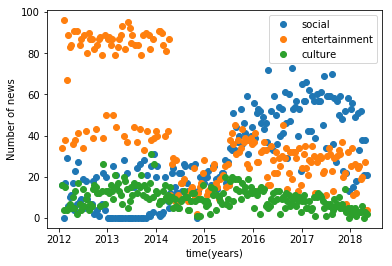

In [141]:
ii =[11*x for x in range(int(len(dates)/11))]
plt.plot_date(x[ii],y[ii,0], label='social')
plt.plot_date(x[ii],y[ii,1], label='entertainment')
plt.plot_date(x[ii],y[ii,2], label='culture')
plt.legend()
plt.xlabel('time(years)')
plt.ylabel('Number of news')
plt.savefig('news and years.png')

In [0]:
data['headline'].replace('', np.nan, inplace=True)
data['short_description'].replace('', np.nan, inplace=True)
data.dropna(subset=['short_description'], inplace=True)
data.dropna(subset=['headline'], inplace=True)
x = np.array(data[['headline', 'short_description']])[:10000]
y = np.array(data.category.astype("category").cat.codes)[:10000]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**ENCODING THE TEXT DATA**

In [136]:
vectorizer = TfidfVectorizer(stop_words=cwlist, max_features=7310)
train_vector1 = vectorizer.fit_transform(x_train[:,0])
train_vector2 = vectorizer.fit_transform(x_train[:,1])
train_vector = hstack([train_vector1,train_vector2]).toarray()

test_vector1 = vectorizer.fit_transform(x_test[:,0])
test_vector2 = vectorizer.fit_transform(x_test[:,1])
test_vector = hstack([test_vector1,test_vector2]).toarray()

from sklearn.svm import SVC
clf = SVC(gamma='auto')

clf1 = RandomForestClassifier(n_estimators=1000)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['photo', 'photos', 'video'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


**SVC FITTING**

In [142]:
clf.fit(train_vector, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [143]:
clf.score(test_vector, y_test)

0.3526666666666667

**RANDOM FOREST FITTING**

In [144]:
clf1.fit(train_vector, y_train)
clf1.score(test_vector, y_test)

0.20966666666666667